<a href="https://colab.research.google.com/github/DJ1070/Bike-Sharing/blob/main/bikeshare_2021_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import files 
uploaded = files.upload()

Saving rides_2020_timeseries.csv to rides_2020_timeseries (1).csv


In [52]:
import pandas as pd 
import io 
import fbprophet as Prophet
import plotly.express as px
  
df = pd.read_csv(io.BytesIO(uploaded['rides_2020_timeseries.csv']), index_col='date', parse_dates=True) 
#df = pd.read_csv(io.BytesIO(uploaded['rides_2020_timeseries.csv'])) 
print(df.head(3))

            rides
date             
2020-01-01   4135
2020-01-02   6969
2020-01-03   5048


In [53]:
df_ride_predict = df
# df_ride_predict = df_ride_predict.drop(['ride_id', 'rideable_type', 'ended_at',
#        'start_station_name', 'start_station_id', 'end_station_name',
#        'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
#        'member_casual'], axis = 1)
# print(df_ride_predict.head(3))

In [54]:
df_ride_predict = df_ride_predict.reset_index()

In [55]:
df_ride_predict.columns = ['ds', 'y']

In [56]:
df_ride_predict.head(3)

,ds,y
0,2020-01-01,4135
1,2020-01-02,6969
2,2020-01-03,5048


In [57]:
#m = Prophet()
m = Prophet.Prophet()
m.fit(df_ride_predict)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [58]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
726,2021-12-27
727,2021-12-28
728,2021-12-29
729,2021-12-30
730,2021-12-31


In [59]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,5846.704886,3460.765750,8462.877993
1,2020-01-02,5543.682428,3051.353746,8004.426889
2,2020-01-03,6351.072848,3763.951957,8781.954007
3,2020-01-04,8176.803265,5604.446913,10738.927947
4,2020-01-05,6923.082471,4292.758766,9365.191278
...,...,...,...,...
726,2021-12-27,-12920.001199,-21741.648452,-4103.996922
727,2021-12-28,-12720.903303,-21098.546434,-4052.204609
728,2021-12-29,-12723.711163,-20918.936554,-3720.775472
729,2021-12-30,-13053.926600,-21664.752586,-4229.303647


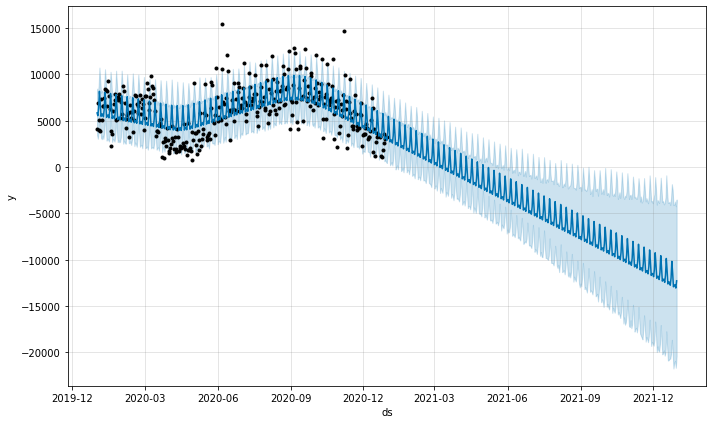

In [60]:

# Python
fig1 = m.plot(forecast)

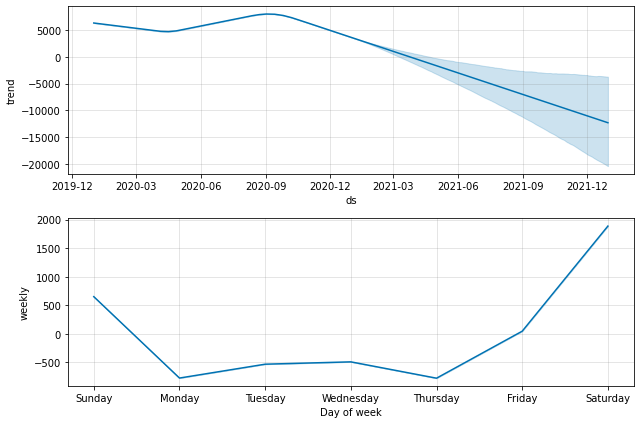

In [37]:
fig2 = m.plot_components(forecast)

In [74]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [39]:
plot_components_plotly(m, forecast)